In [1]:
import torch
from torch import nn

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Cross-Correlation Operation

In [2]:
torch.Tensor([[1,2,3],[4,5,6]]).shape

torch.Size([2, 3])

In [3]:
def corr2d(X,K):
    """Compute 2D cross-correlation"""
    h, w = K.shape
    # feature map size
    Y = torch.zeros(X.shape[0] - h + 1, X.shape[1] - w + 1)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i,j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [4]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

### Convolutional Layers

In [5]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))
    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

### Object Detection in Image

In [6]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

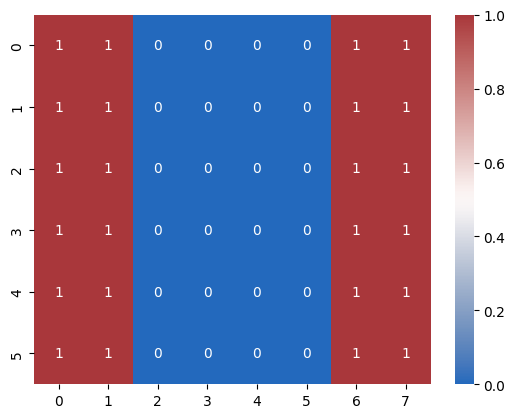

In [24]:
color = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(X, annot=True, cmap=color)
plt.show()

In [25]:
# Kernel K (detect only vertical)
K = torch.tensor([[1.0, -1.0]])

In [26]:
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

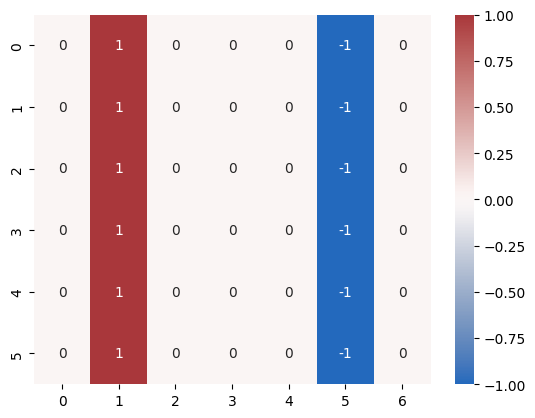

In [27]:
color = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(Y, annot=True, cmap=color)
plt.show()

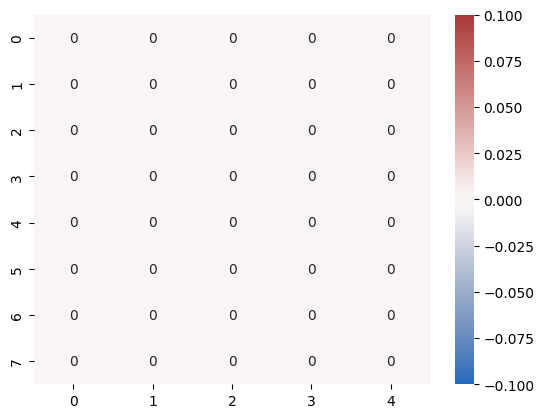

In [29]:
sns.heatmap(corr2d(X.t(), K), cmap=color, annot= True)
plt.show()

Above image show that kernel can only detect vertical edges as it vanishes on horizontal edge 